# 結果比較

In [1]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [6]:
def discon_flg(df):
    df['discon_flg'] = (df['discon_cnt'] > 0).astype(int)
    return df

In [34]:
# 比較元
BEFORE_CSV = os.path.join('/home', 'jupyter', 'work', 'result', '20230129_0046_max_min_euc_dist_03_test_stress_main_test.csv')
before_df = pd.read_csv(BEFORE_CSV)
before_df = discon_flg(before_df)

# 比較先
AFTER_CSV = os.path.join('/home', 'jupyter', 'work', 'result', '20230129_0046_max_min_euc_dist_03_test_stress_main_test.csv')
after_df = pd.read_csv(AFTER_CSV)
after_df = discon_flg(after_df)

In [35]:
compare_cols = ['cost', 'discon_flg', 'discon_cnt', 'time']

before_df.columns = [c + '_before' if c in compare_cols else c for c in before_df.columns]

cols = compare_cols.copy()
cols.append('seed')
after_df = after_df[cols]
after_df.columns = [c + '_after' if c in compare_cols else c for c in after_df.columns]

In [37]:
merge_df = pd.merge(before_df, after_df, on=['seed'], how='left')
merge_df

,testset,seed,N,M,D,K,time_before,cost_before,discon_cnt_before,discon_flg_before,cost_after,discon_flg_after,discon_cnt_after,time_after
0,03_test_stress,0,791,2277,11,361,2838,10447535,0,0,10447535,0,0,2838
1,03_test_stress,1,623,1146,25,70,1201,14323787,0,0,14323787,0,0,1201
2,03_test_stress,2,898,1576,8,356,1498,614052174,3584,1,614052174,1,3584,1498
3,03_test_stress,3,830,1605,12,209,1534,26342149,0,0,26342149,0,0,1534
4,03_test_stress,4,700,1500,14,112,1424,16142516,0,0,16142516,0,0,1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,03_test_stress,9995,879,1701,7,384,1833,50195819,0,0,50195819,0,0,1833
9996,03_test_stress,9996,878,1532,15,115,1332,330432751,3504,1,330432751,1,3504,1332
9997,03_test_stress,9997,731,1537,30,75,1504,98632378,1460,1,98632378,1,1460,1504
9998,03_test_stress,9998,742,1778,5,614,1274,45966030,0,0,45966030,0,0,1274


In [38]:
np.mean(merge_df['cost_after'])

206861415.5991

## 全体比較(コスト)

In [39]:
def y_plot(y):
    val_list = []
    
    for postfix in ('before', 'after'):
        col = y + '_' + postfix
        
        val = np.mean(merge_df[col])
        val_list.append(val)
        
        print('{}: {:.1f}'.format(postfix, val))
    
    plt.title(y)
    plt.bar(['before', 'after'], val_list);

before: 206861415.6
after: 206861415.6


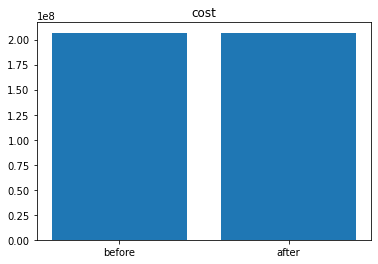

In [40]:
y_plot('cost')

In [41]:
def xy_plot(x, y):
    plot_df = merge_df.groupby(x).mean()

    for postfix in ('before', 'after'):
        col = y + '_' + postfix

        plt.plot(plot_df.index, plot_df[col], label=postfix)

    plt.title(y)
    plt.xlabel(x)
    plt.legend();    

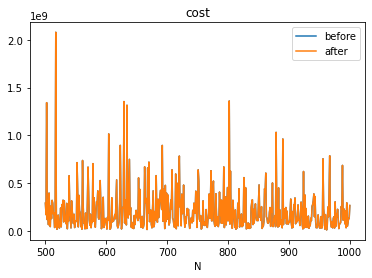

In [42]:
xy_plot('N', 'cost')

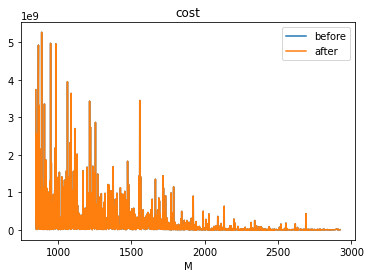

In [43]:
xy_plot('M', 'cost')

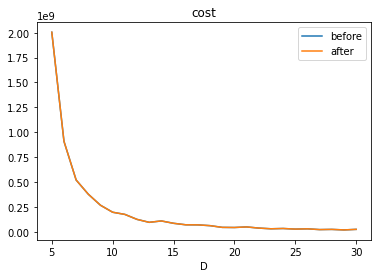

In [44]:
xy_plot('D', 'cost')

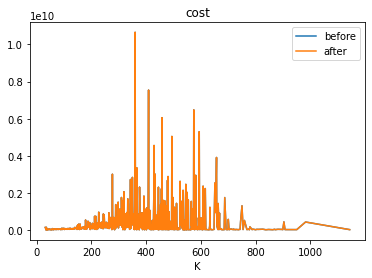

In [45]:
xy_plot('K', 'cost')

## 頂点数

before: 68.8
after: 68.8


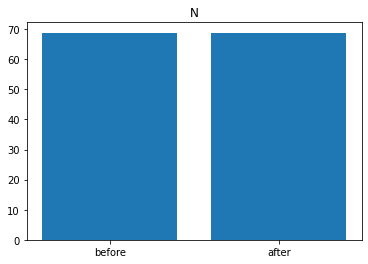

In [233]:
col = 'N'
y_plot(col)

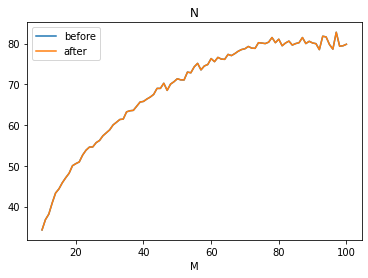

In [234]:
xy_plot('M', col)

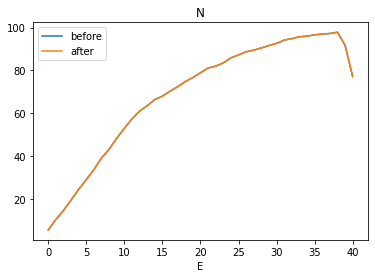

In [235]:
xy_plot('E', col)

## 誤答数

before: 9.5
after: 6.1


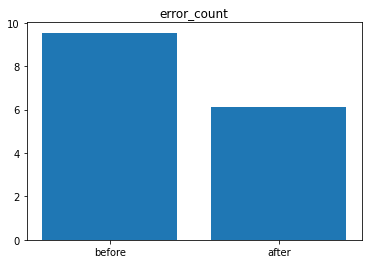

In [236]:
col = 'error_count'
y_plot(col)

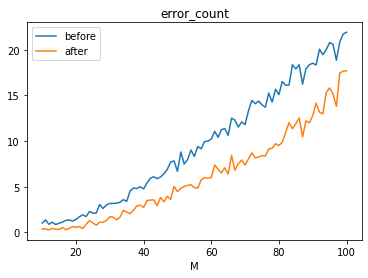

In [237]:
xy_plot('M', col)

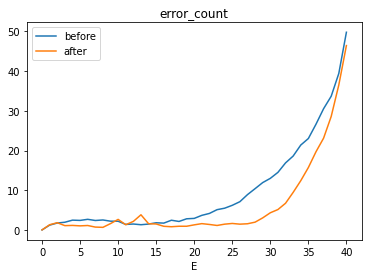

In [238]:
xy_plot('E', col)